<a href="https://colab.research.google.com/github/TreeBranchWL/TreeBranch-project/blob/main/TREEBRANCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')



<ipython-input-33-ccff3312115d>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')


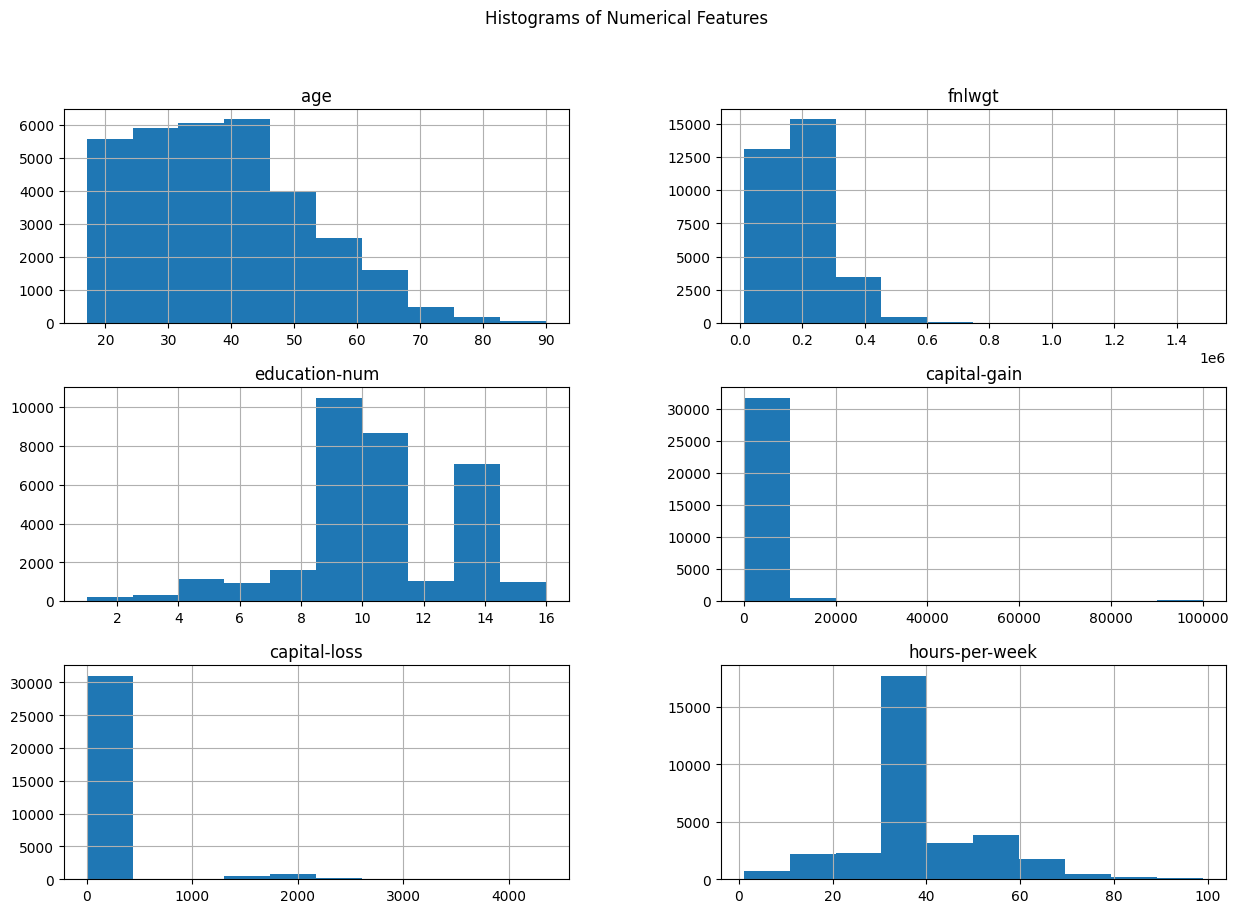

In [ ]:
#Histograms for Numerical Features
import matplotlib.pyplot as plt

num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data[num_features].hist(figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

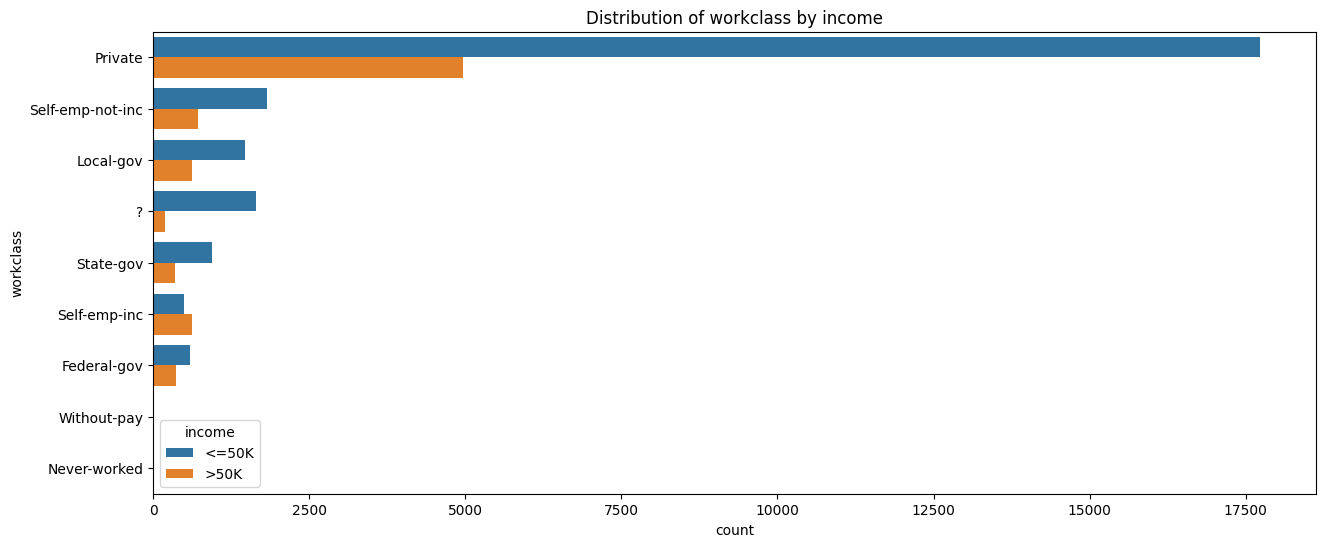

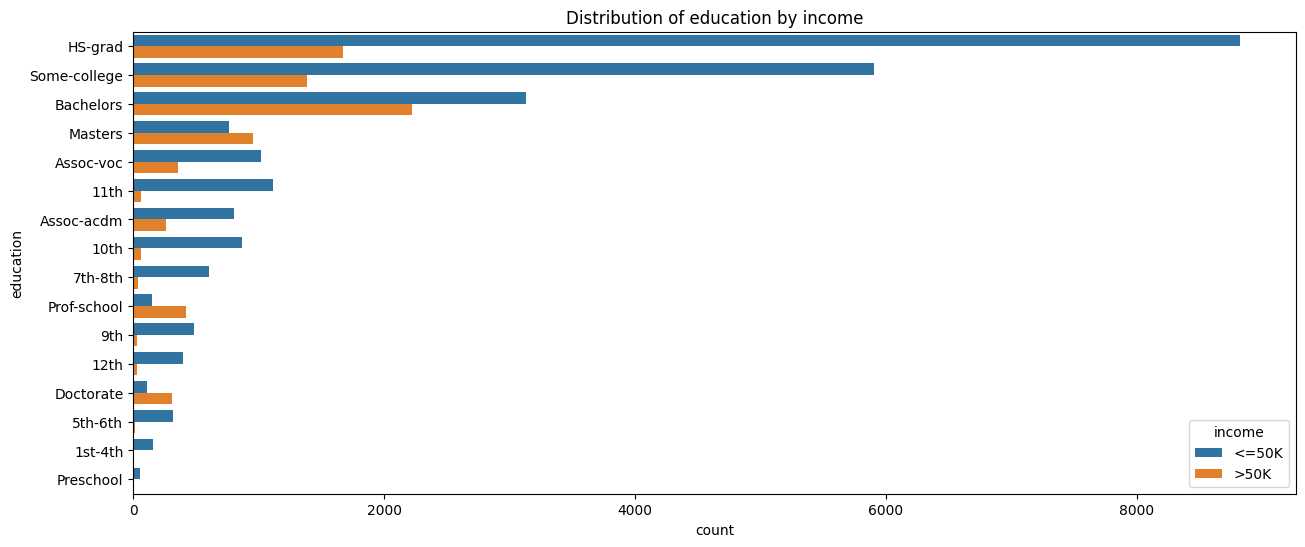

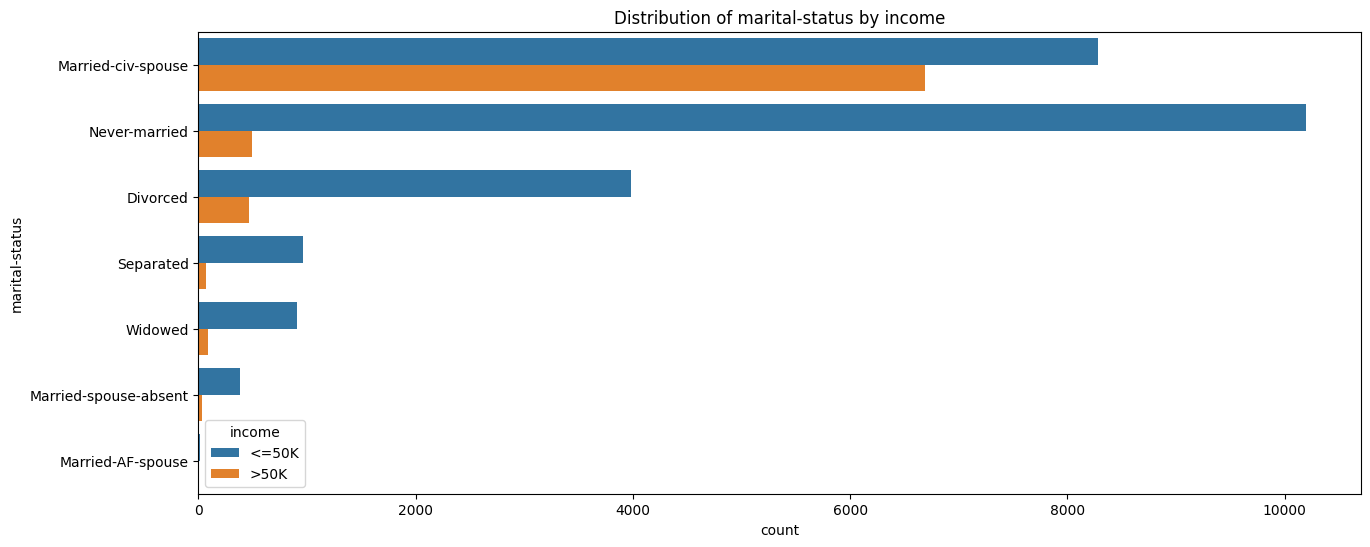

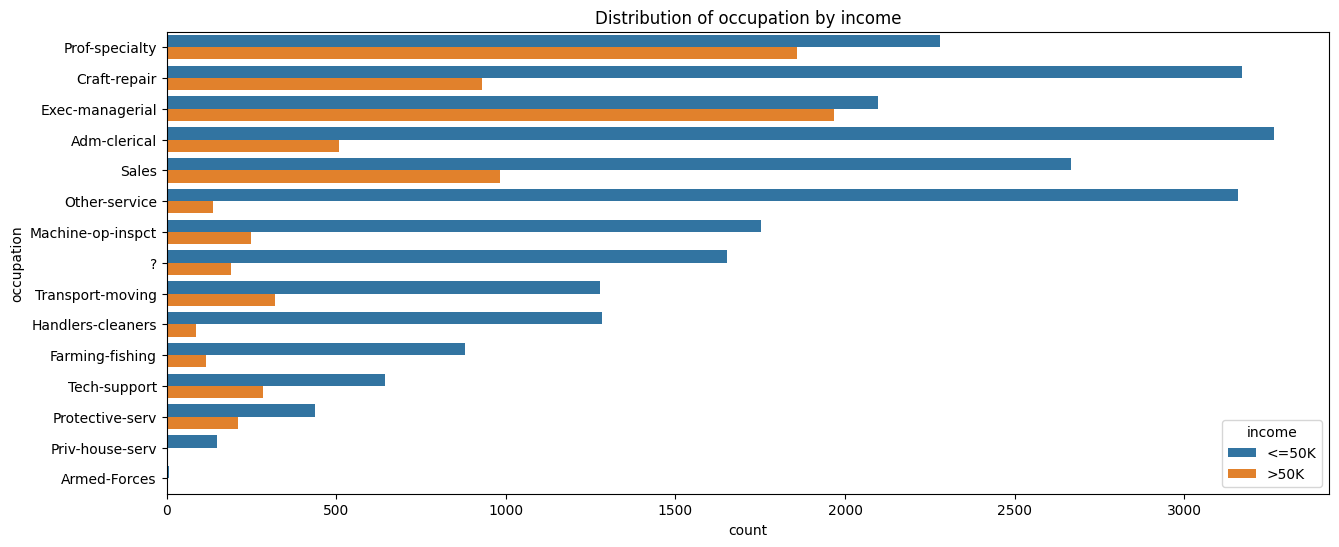

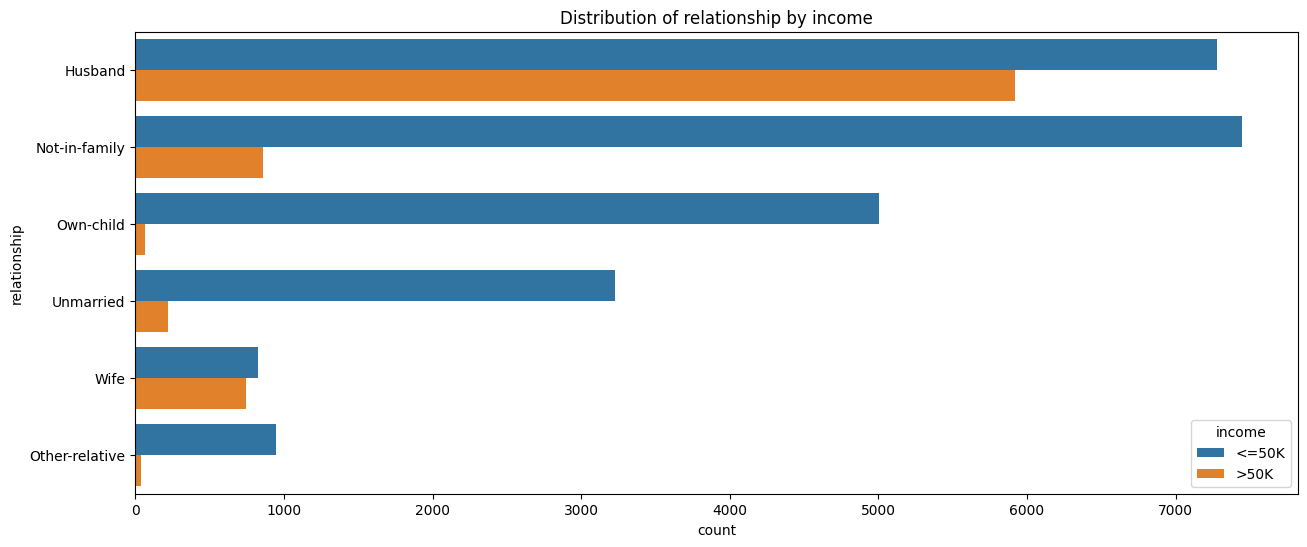

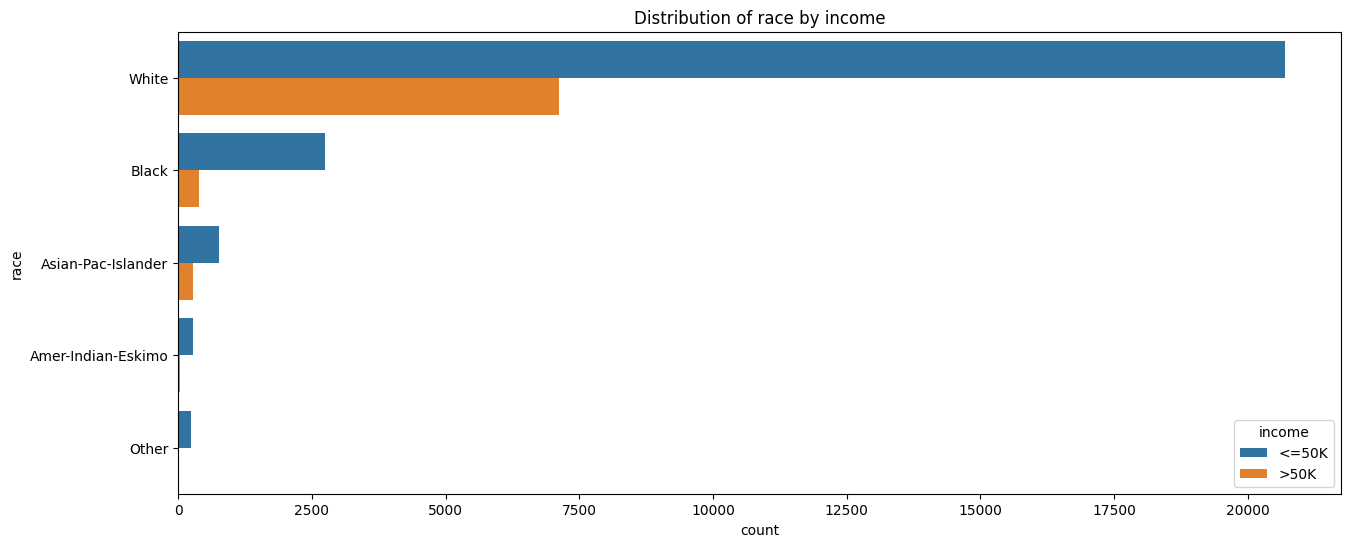

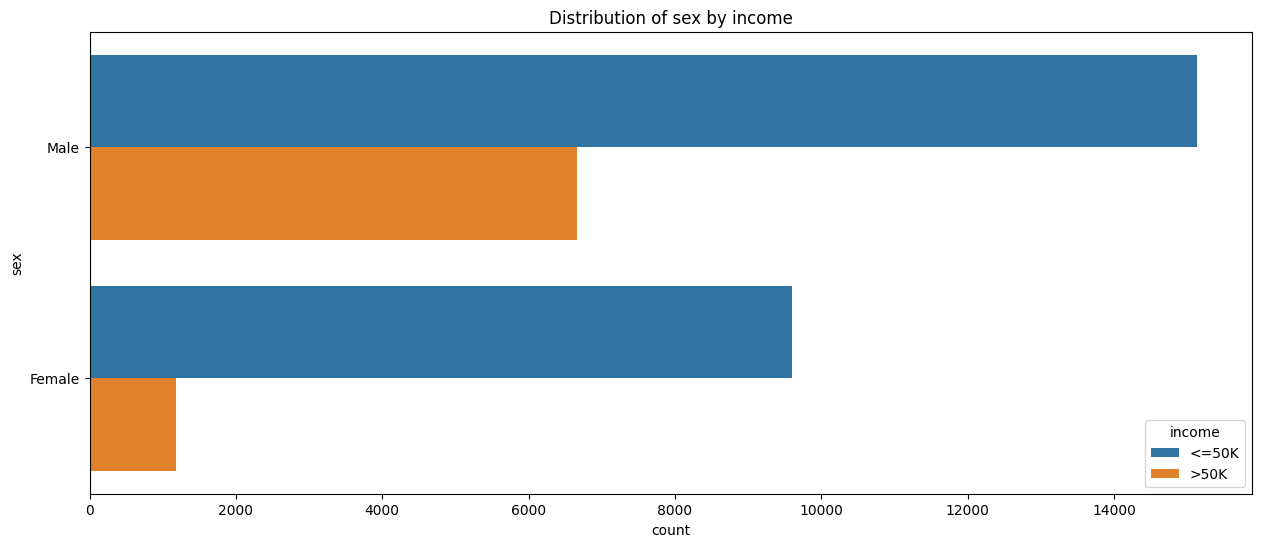

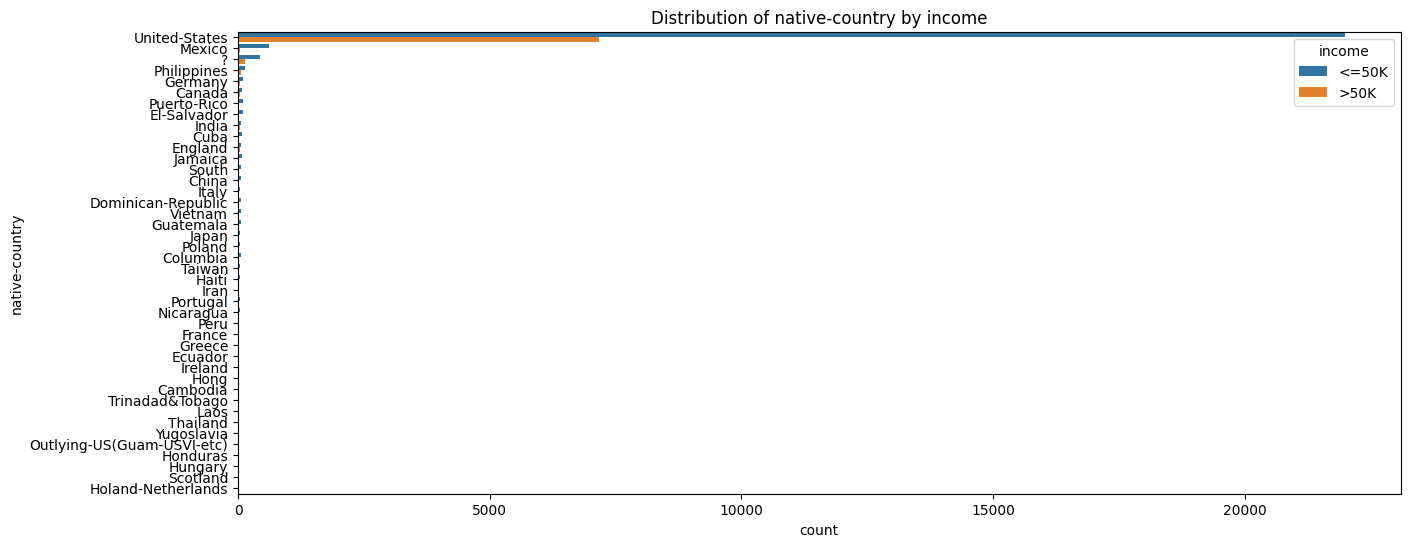

In [ ]:
#Bar Plots for Categorical Features with income
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in cat_features:
    plt.figure(figsize=(15,6))
    sns.countplot(y=feature, hue="income", data=data, order = data[feature].value_counts().index)
    plt.title(f"Distribution of {feature} by income")
    plt.show()


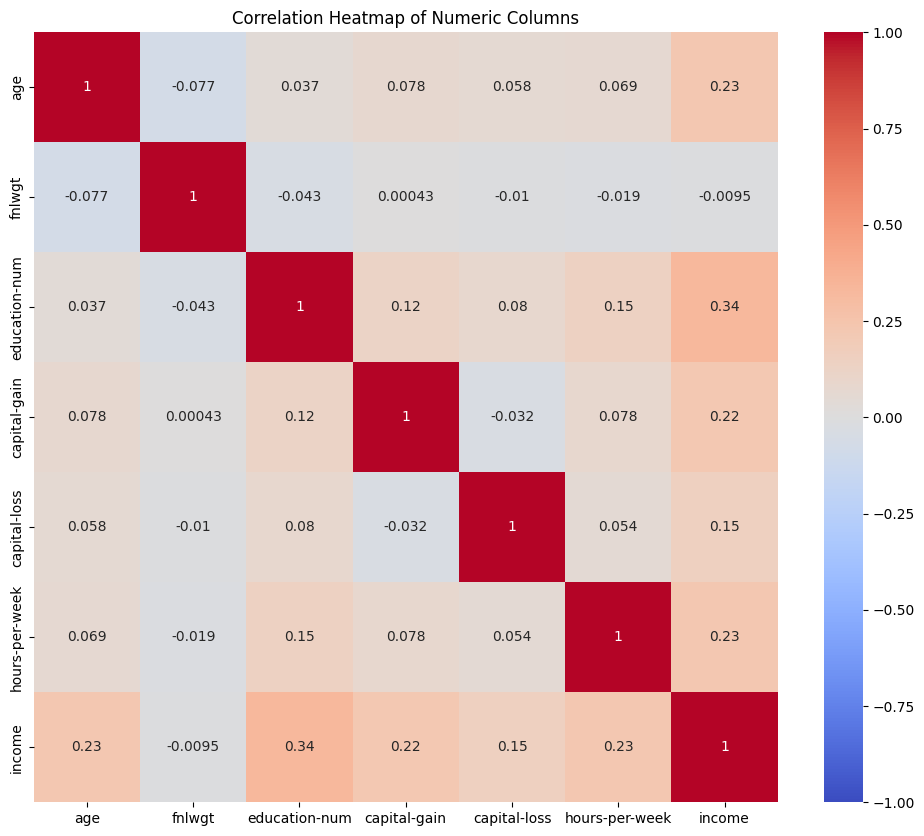

In [ ]:
####heatmap before clean
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

# Filtering numeric columns from a dataset
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical columns
corr = numeric_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
######Data cleaning
import pandas as pd

# read data
db_adult = pd.read_csv("adult.data", sep=",", header=None)

# name columns
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
                "hours_per_week", "native_country", "income"]
db_adult.columns = column_names

##drop education and fnlwgt( unnecessary data)

db_adult.drop(columns=["education", "fnlwgt"], inplace=True)

# Copying the original data for subsequent viewing
db_adult_original = db_adult.copy()

# Output the statistics of the data before replacement
print("Before replacement:")
for column in db_adult_original.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(db_adult_original[column].value_counts())
    print("-------------\n")

# Replace missing values in classification features with 'unknown'
categorical_columns = db_adult.select_dtypes(include=['object']).columns
for column in categorical_columns:
    db_adult[column] = db_adult[column].astype(str).replace(" ?", "unknown")

# Replace missing values in numeric features with 0
numerical_columns = db_adult.select_dtypes(exclude=['object']).columns
for column in numerical_columns:
    db_adult[column].fillna(0, inplace=True)

# Renumber the rows of the data frame
db_adult.index = range(1, len(db_adult) + 1)

# print the data
print("After replacement:")
for column in db_adult.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(db_adult[column].value_counts())
    print("-------------\n")



Before replacement:
Column: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
-------------

Column: marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
-------------

Column: occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-h

            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.030671       1.134739      0.148453      -0.21666       -0.035429
1      0.837109       1.134739     -0.145920      -0.21666       -2.222153
2     -0.042642      -0.420060     -0.145920      -0.21666       -0.035429
3      1.057047      -1.197459     -0.145920      -0.21666       -0.035429
4     -0.775768       1.134739     -0.145920      -0.21666       -0.035429
...         ...            ...           ...           ...             ...
32556 -0.849080       0.746039     -0.145920      -0.21666       -0.197409
32557  0.103983      -0.420060     -0.145920      -0.21666       -0.035429
32558  1.423610      -0.420060     -0.145920      -0.21666       -0.035429
32559 -1.215643      -0.420060     -0.145920      -0.21666       -1.655225
32560  0.983734      -0.420060      1.888424      -0.21666       -0.035429

[32561 rows x 5 columns]
Number of outliers detected by z-score: 2410


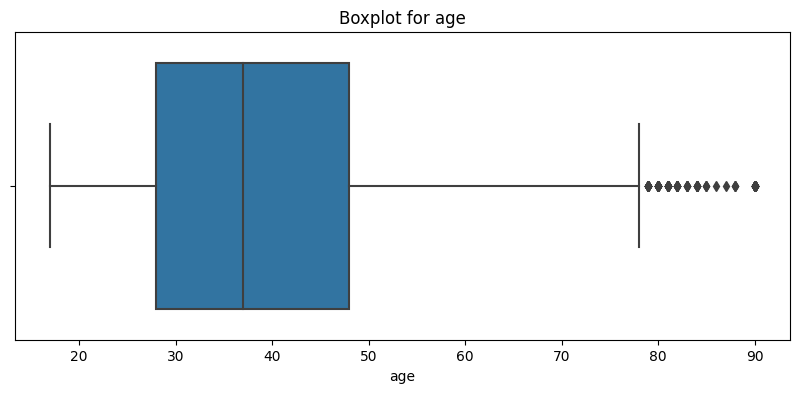

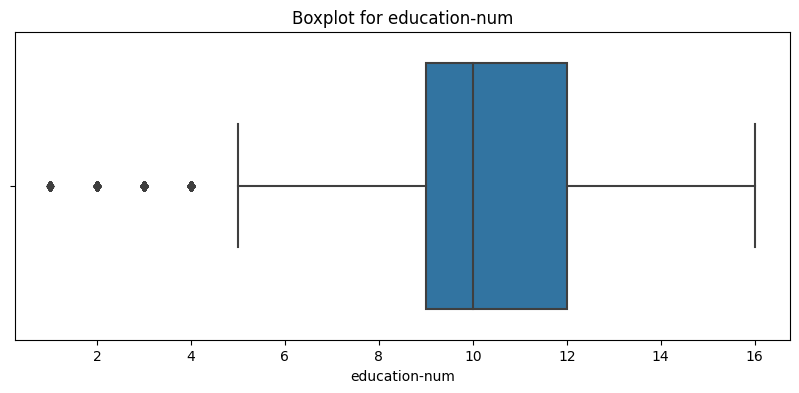

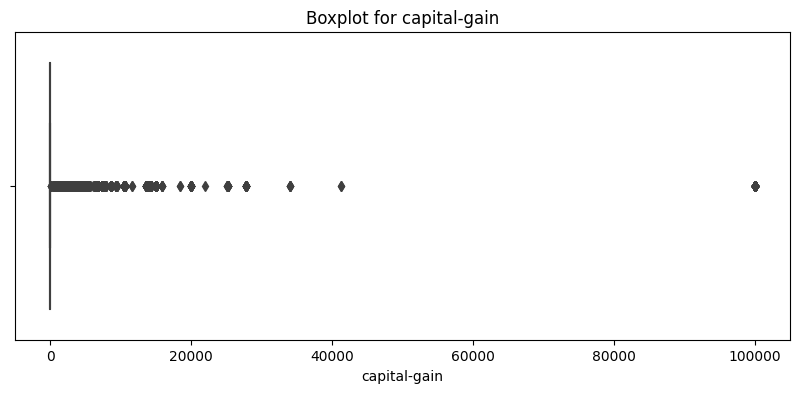

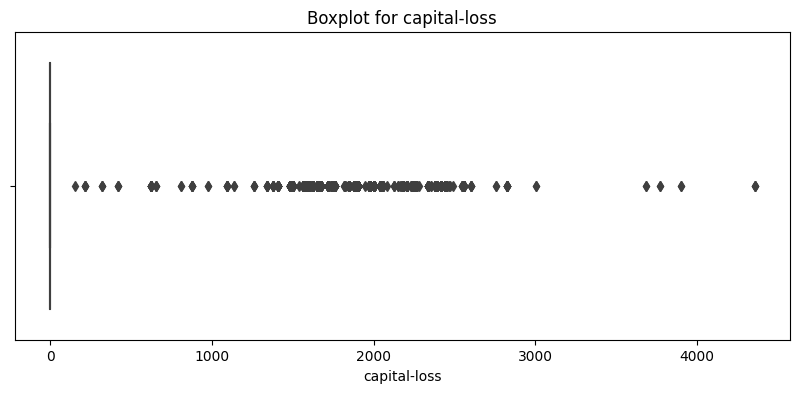

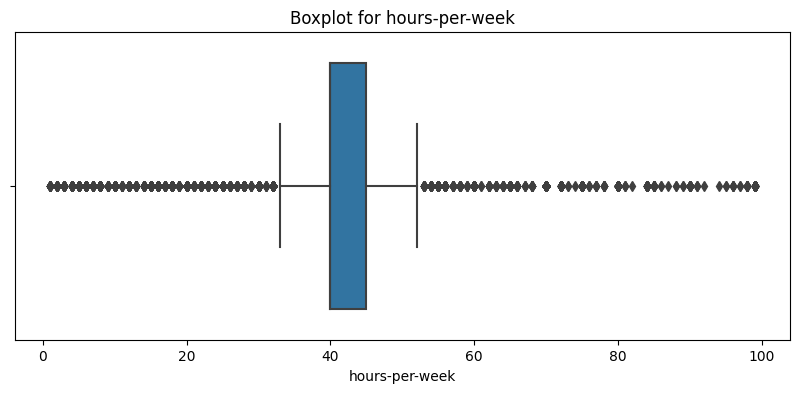

In [ ]:
##Before outlier detection

import numpy as np
from scipy.stats import zscore

# import data and check z score
numeric_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
z_scores = zscore(data[numeric_cols])
print(z_scores)
abs_z_scores = np.abs(z_scores)

# Find rows where any column has an absolute z-score > 3
outliers_zscore = (abs_z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = outliers_zscore.sum()

print(f"Number of outliers detected by z-score: {num_outliers}")

##box plot
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()




            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.030671       1.134739      0.148453      -0.21666       -0.035429
1      0.837109       1.134739     -0.145920      -0.21666       -2.222153
2     -0.042642      -0.420060     -0.145920      -0.21666       -0.035429
3      1.057047      -1.197459     -0.145920      -0.21666       -0.035429
4     -0.775768       1.134739     -0.145920      -0.21666       -0.035429
...         ...            ...           ...           ...             ...
32556 -0.849080       0.746039     -0.145920      -0.21666       -0.197409
32557  0.103983      -0.420060     -0.145920      -0.21666       -0.035429
32558  1.423610      -0.420060     -0.145920      -0.21666       -0.035429
32559 -1.215643      -0.420060     -0.145920      -0.21666       -1.655225
32560  0.983734      -0.420060      1.888424      -0.21666       -0.035429

[32561 rows x 5 columns]
The percentage of people working 90-100 hours per week is: 0.43%
Number of

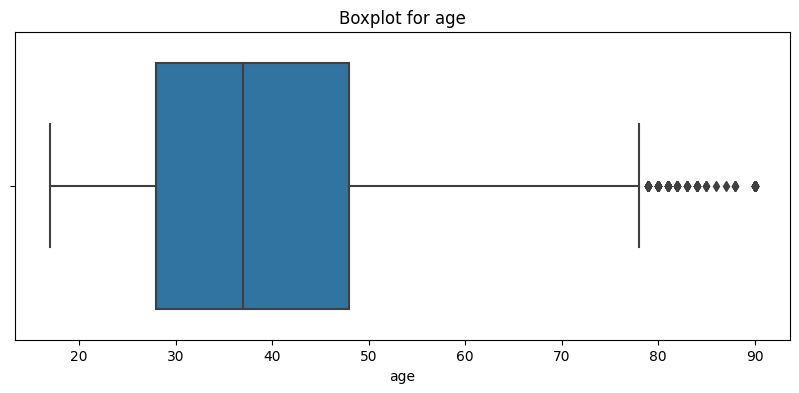

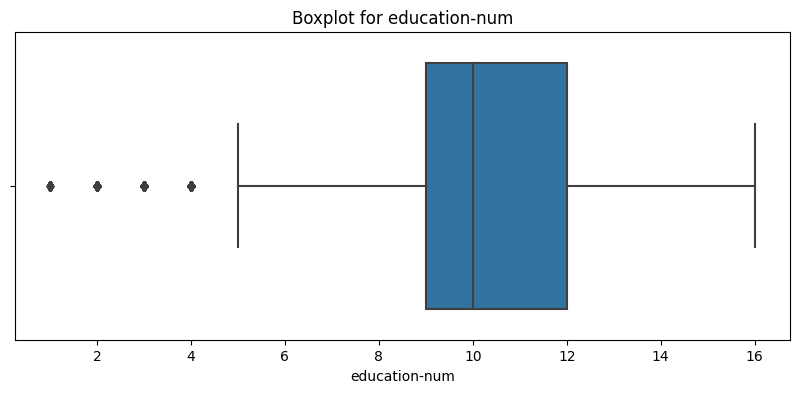

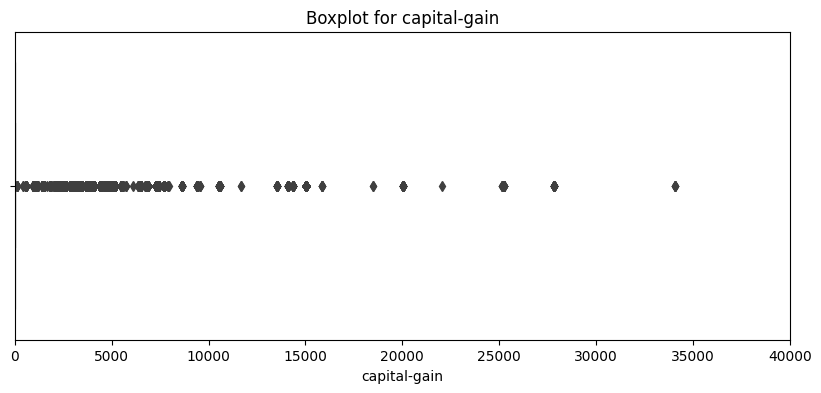

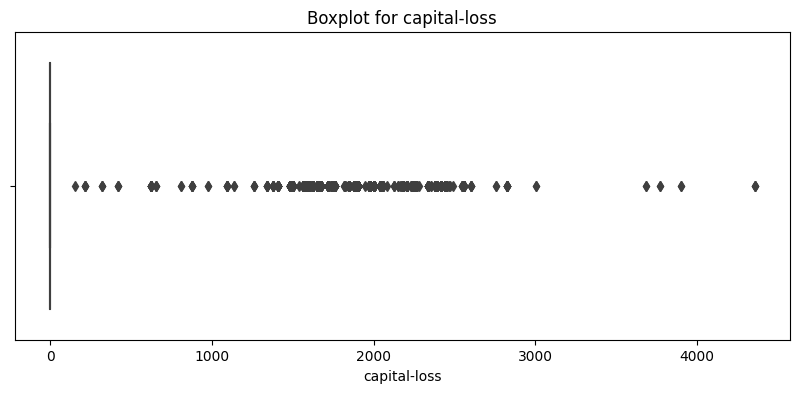

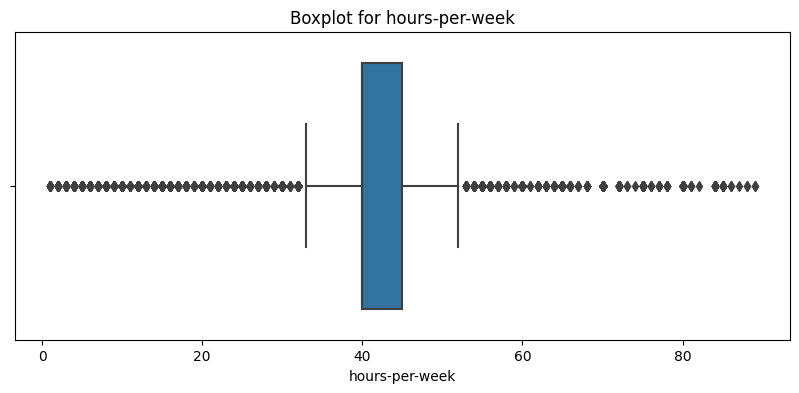

In [ ]:
#After outlier detection
import numpy as np
from scipy.stats import zscore
import pandas as pd

# import data and check z scores.
numeric_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
z_scores = zscore(data[numeric_cols])
print(z_scores)
abs_z_scores = np.abs(z_scores)

# checking work hours per week
filtered_data = data[(data["hours-per-week"] >= 90) & (data["hours-per-week"] <= 100)]

percentage = (len(filtered_data) / len(data)) * 100

print(f"The percentage of people working 90-100 hours per week is: {percentage:.2f}%")

## delete 90-100 hours/per week

data = data[(data["hours-per-week"] < 90) | (data["hours-per-week"] > 100)]

# Find rows where any column has an absolute z-score > 3
outliers_zscore = (abs_z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = outliers_zscore.sum()

print(f"Number of outliers detected by z-score: {num_outliers}")

##box plot
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    if col == "capital-gain":
        plt.xlim(0, 40000)  # Setting the x-axis limit to 40000 only for "capital-gain"
    plt.show()



In [ ]:
#encoding
### Replace all values in the native-country column that are not 'United-States' with 'Others'
data['native-country'] = data['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')
# One-Hot encoding
cat_features = [
    "workclass", "marital-status", "occupation", "relationship", "race",
    "sex", "native-country", "education"  # Add all other categorical features except 'income'
]
data_encoded = pd.get_dummies(data, columns=cat_features)
print(data_encoded.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0       0            0                      0                    0  ...   
1       0            0                      0                    0  ...   
2       0            0                      0                    0  ...   
3       0            0                      0                    0  ...   
4       0            0                      0                    0  ...   

   education_9th  education_Assoc-acdm  education_Assoc-voc  \
0              0       

Accuracy with One-Hot Encoding: 86.09%


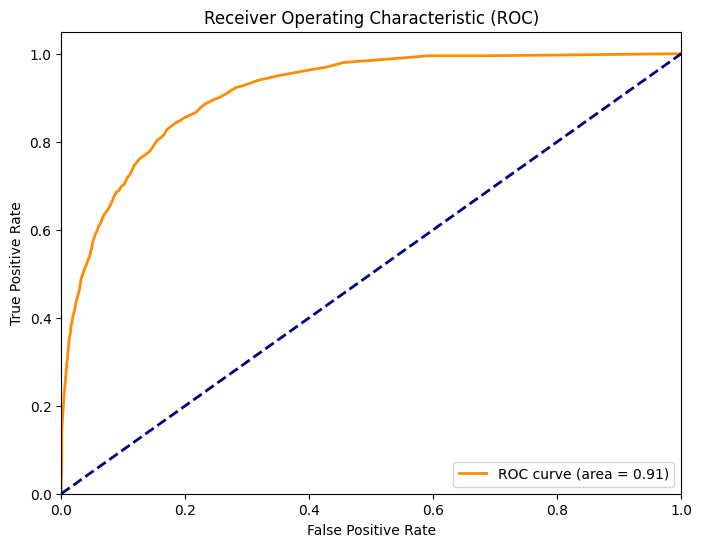

Sensitivity: 0.64
Specificity: 0.93
Precision: 0.73
Confusion Matrix Accuracy: 0.86
Confusion Matrix:
[[4616  358]
 [ 544  967]]


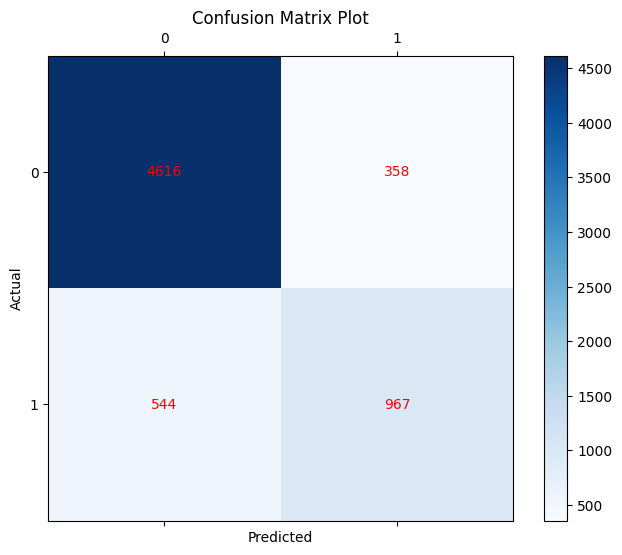

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters from Grid Search:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from Random Search:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 59}
100%|██████████| 50/50 [07:59<00:00,  9.59s/trial, best loss: -0.859235777005529]
Best parameters from Bayesian Optimization:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 72}
Grid Search CV Accuracy: 0.8647833633064866
Random Search CV Accuracy: 0.8595709027190827
Bayesian Optimization CV Accuracy: 0.8599719468407375
new Accuracy with One-Hot Encoding: 86.83%


In [ ]:
# model of random forest after using one hot encoding
# Select all features for training except the target variable 'income'
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
import numpy as np
X_encoded = data_encoded.drop('income', axis=1)#unless income
y_encoded = data_encoded['income']
# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# create a random forest model
rf_encoded = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf_encoded.fit(X_train_encoded, y_train_encoded)

# predict
y_pred_encoded = rf_encoded.predict(X_test_encoded)

# Evaluating model performance
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy with One-Hot Encoding: {accuracy_encoded * 100:.2f}%")
####ROC and AUC


# 用随机森林模型的predict_proba方法获取测试集每个样本的类别预测概率
# 我们需要正类的概率，通常是predict_proba输出的第二列
y_scores_encoded = rf_encoded.predict_proba(X_test_encoded)[:, 1]

# 计算真正阳性率（TPR）和假正阳性率（FPR）
fpr_encoded, tpr_encoded, _ = roc_curve(y_test_encoded, y_scores_encoded)

# 计算AUC
roc_auc_encoded = auc(fpr_encoded, tpr_encoded)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_encoded, tpr_encoded, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_encoded)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##S and S
# Calculate confusion matrix to get sensitivity and specificity
cmrf = confusion_matrix(y_test_encoded, y_pred_encoded)
TP = cmrf[1, 1]  # True Positives
TN = cmrf[0, 0]  # True Negatives
FP = cmrf[0, 1]  # False Positives
FN = cmrf[1, 0]  # False Negatives
# Calculate sensitivity (Recall or True Positive Rate)
sensitivity = TP / float(TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (True Negative Rate)
specificity = TN / float(TN + FP)
print(f"Specificity: {specificity:.2f}")
# Calculate precision
precision = TP / float(TP + FP)
print(f"Precision: {precision:.2f}")
# Calculate accuracy from the confusion matrix
accuracy_cmrf = (TP + TN) / float(TP + TN + FP + FN)
print(f"Confusion Matrix Accuracy: {accuracy_cmrf:.2f}")
# Calculate the confusion matrix
print("Confusion Matrix:")
print(cmrf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cmrf, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cmrf.shape[0]):
    for j in range(cmrf.shape[1]):
        plt.text(j, i, cmrf[i, j], ha='center', va='center', color='red')

plt.show()
###############HP
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, ]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_encoded, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_encoded, y_train_encoded)

# Get the best parameters from grid search
print("Best parameters from Grid Search: ", grid_search.best_params_)
# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(30, 100),
    'max_depth': [10, None],
    'min_samples_split': randint(2, 6)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_encoded, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_encoded, y_train_encoded)

# Get the best parameters from random search
print("Best parameters from Random Search: ", random_search.best_params_)
# Define the hyperparameter space for Bayesian Optimization
space = {
    'n_estimators': hp.quniform('n_estimators', 30, 100, 1),
    'max_depth': hp.choice('max_depth', [10, None]),
    'min_samples_split': hp.quniform('min_samples_split', 2, 6, 1)
}

# Objective function to minimize
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': params['max_depth'], 'min_samples_split': int(params['min_samples_split'])}
    clf = RandomForestClassifier(**params, random_state=42)
    accuracy = cross_val_score(clf, X_train_encoded, y_train_encoded, cv=5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the Bayesian Optimization algorithm
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert max_depth to the actual value since it's returned as an index
best_params['max_depth'] = [None, 10, 20, 30][best_params['max_depth']]
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])

print("Best parameters from Bayesian Optimization: ", best_params)


#########CROSS VALADIATION
# Define the hyperparameters sets from the results of the different searches
params_grid_search = {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
params_random_search = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 59}
params_bayesian_opt = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 61}

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation
def evaluate_model(params, X, y, kf):
    model = RandomForestClassifier(**params, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return np.mean(cv_scores), cv_scores
# Evaluate each model with cross-validation
accuracy_grid_search, scores_grid_search = evaluate_model(params_grid_search, X_encoded, y_encoded, kf)
accuracy_random_search, scores_random_search = evaluate_model(params_random_search, X_encoded, y_encoded, kf)
accuracy_bayesian_opt, scores_bayesian_opt = evaluate_model(params_bayesian_opt, X_encoded, y_encoded, kf)

# Print the results
print(f'Grid Search CV Accuracy: {accuracy_grid_search}')
print(f'Random Search CV Accuracy: {accuracy_random_search}')
print(f'Bayesian Optimization CV Accuracy: {accuracy_bayesian_opt}')

####
####After CV, we use grid search
# Best parameters from Grid Search
params_grid_search = {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

# Create a RandomForestClassifier with the best parameters
rfbest_model = RandomForestClassifier(**params_grid_search, random_state=42)

# Assuming `X_train_encoded` and `y_train_encoded` are available, we will fit the model
rfbest_model.fit(X_train_encoded, y_train_encoded)

# We will also assume that we have `X_test_encoded` and `y_test_encoded` to evaluate the model
y_pred_encoded = rfbest_model.predict(X_test_encoded)
new_accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"new Accuracy with One-Hot Encoding: {new_accuracy_encoded * 100:.2f}%")

Accuracy with One-Hot Encoding using SVM: 80.19%


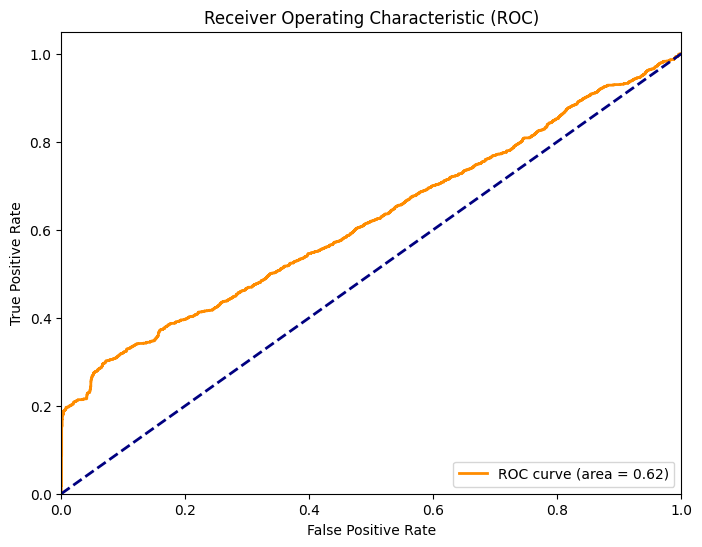

Sensitivity: 0.15
Specificity: 1.00
Precision: 0.98
Confusion Matrix Accuracy: 0.80
Confusion Matrix:
[[4970    4]
 [1281  230]]


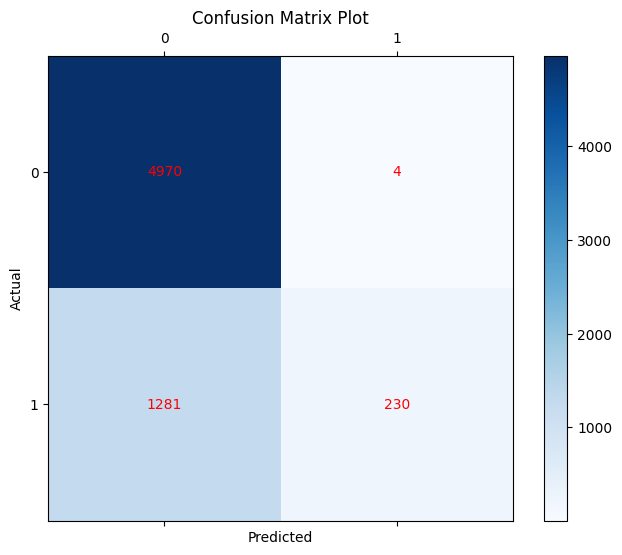

In [ ]:
###SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# Prepare the features and target variable
X_encoded = data_encoded.drop('income', axis=1)
Y_encoded = data_encoded['income']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_encoded = SVC(random_state=42, probability=True)

# Train the SVM classifier
svm_encoded.fit(X_train_encoded, y_train_encoded)

# Predict using the trained SVM model
y_pred_encoded = svm_encoded.predict(X_test_encoded)

# Calculate the accuracy
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy with One-Hot Encoding using SVM: {accuracy_encoded * 100:.2f}%")
####ROC and AUC
y_scores_encoded = svm_encoded.predict_proba(X_test_encoded)[:, 1]
# Compute ROC curve and ROC AUC
fpr_encoded, tpr_encoded, _ = roc_curve(y_test_encoded, y_scores_encoded)
roc_auc_encoded = auc(fpr_encoded, tpr_encoded)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_encoded, tpr_encoded, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_encoded)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
##S and S
# Calculate confusion matrix to get sensitivity and specificity
cmsvm = confusion_matrix(y_test_encoded, y_pred_encoded)
TP = cmsvm[1, 1]  # True Positives
TN = cmsvm[0, 0]  # True Negatives
FP = cmsvm[0, 1]  # False Positives
FN = cmsvm[1, 0]  # False Negatives

# Calculate sensitivity (Recall or True Positive Rate)
sensitivity = TP / float(TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (True Negative Rate)
specificity = TN / float(TN + FP)
print(f"Specificity: {specificity:.2f}")
# Calculate precision
precision = TP / float(TP + FP)
print(f"Precision: {precision:.2f}")
# Calculate accuracy from the confusion matrix
accuracy_cmsvm = (TP + TN) / float(TP + TN + FP + FN)
print(f"Confusion Matrix Accuracy: {accuracy_cmsvm:.2f}")
#Calculate the confusion matrix
print("Confusion Matrix:")
print(cmsvm)
##Cross validation
# Perform cross-validation
#cv_scoressvm = cross_val_score(svm_encoded, X_encoded, y_encoded, cv=5, scoring='accuracy')

# Print the cross-validation scores
#print("Cross-validation scores: ", cv_scoressvm)
#print("Mean cross-validation score: {:.2f}%".format(cv_scoressvm.mean() * 100))
#Calculate the confusion matrix
#cmsvm = confusion_matrix(y_test_encoded, y_pred_encoded)
#print("Confusion Matrix:")
#print(cmsvm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cmsvm, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cmsvm.shape[0]):
    for j in range(cmsvm.shape[1]):
        plt.text(j, i, cmsvm[i, j], ha='center', va='center', color='red')

plt.show()

Accuracy with One-Hot Encoding using Logistic Regression: 80.15%


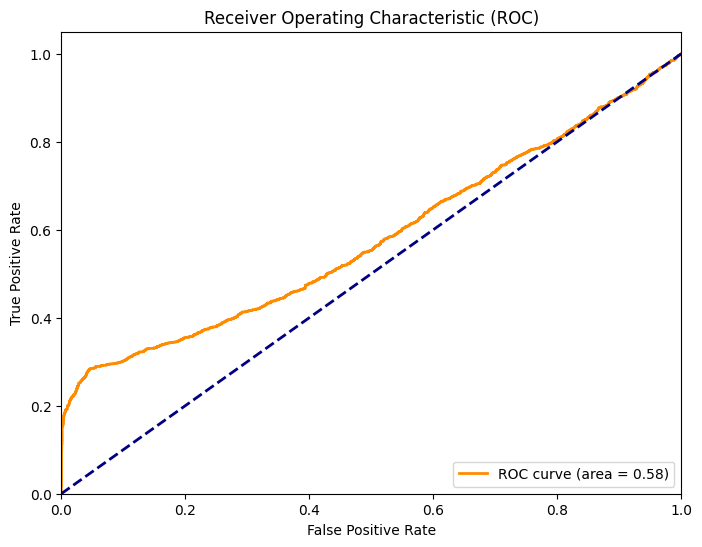

Sensitivity: 0.26
Specificity: 0.97
Precision: 0.70
Confusion Matrix Accuracy: 0.80
Confusion Matrix:
[[4809  165]
 [1122  389]]


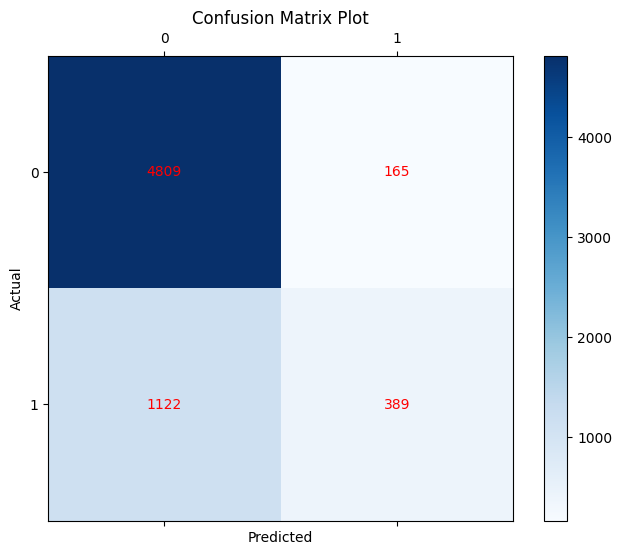

In [ ]:
###Logstic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
# Prepare the features and target variable
X_encoded = data_encoded.drop('income', axis=1)
Y_encoded = data_encoded['income']

# Split the data into training and testing sets
X_train_encodedlr, X_test_encodedlr, y_train_encodedlr, y_test_encodedlr = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# Train the Logistic Regression classifier
logistic_regression.fit(X_train_encodedlr, y_train_encodedlr)

# Predict using the trained Logistic Regression model
y_pred_encodedlr = logistic_regression.predict(X_test_encodedlr)

# Calculate the accuracy
accuracy_encodedlr = accuracy_score(y_test_encodedlr, y_pred_encodedlr)
print(f"Accuracy with One-Hot Encoding using Logistic Regression: {accuracy_encodedlr * 100:.2f}%")
####AUC and ROC
# Predict probabilities for ROC AUC
y_scores_encodedlr = logistic_regression.predict_proba(X_test_encodedlr)[:, 1]

# Compute ROC curve and ROC AUC
fpr_encodedlr, tpr_encodedlr, _ = roc_curve(y_test_encodedlr, y_scores_encodedlr)
roc_auc_encodedlr = auc(fpr_encodedlr, tpr_encodedlr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_encodedlr, tpr_encodedlr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_encodedlr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##S and S
# Calculate confusion matrix to get sensitivity and specificity
cmlr = confusion_matrix(y_test_encodedlr, y_pred_encodedlr)
TP = cmlr[1, 1]  # True Positives
TN = cmlr[0, 0]  # True Negatives
FP = cmlr[0, 1]  # False Positives
FN = cmlr[1, 0]  # False Negatives

# Calculate sensitivity (Recall or True Positive Rate)
sensitivity = TP / float(TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (True Negative Rate)
specificity = TN / float(TN + FP)
print(f"Specificity: {specificity:.2f}")
# Calculate precision
precision = TP / float(TP + FP)
print(f"Precision: {precision:.2f}")
# Calculate accuracy from the confusion matrix
accuracy_cmlr = (TP + TN) / float(TP + TN + FP + FN)
print(f"Confusion Matrix Accuracy: {accuracy_cmlr:.2f}")
#Calculate the confusion matrix
print("Confusion Matrix:")
print(cmlr)


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cmlr, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cmlr.shape[0]):
    for j in range(cmlr.shape[1]):
        plt.text(j, i, cmlr[i, j], ha='center', va='center', color='red')

plt.show()

Accuracy with Gradient Boosting Classifier: 86.68%


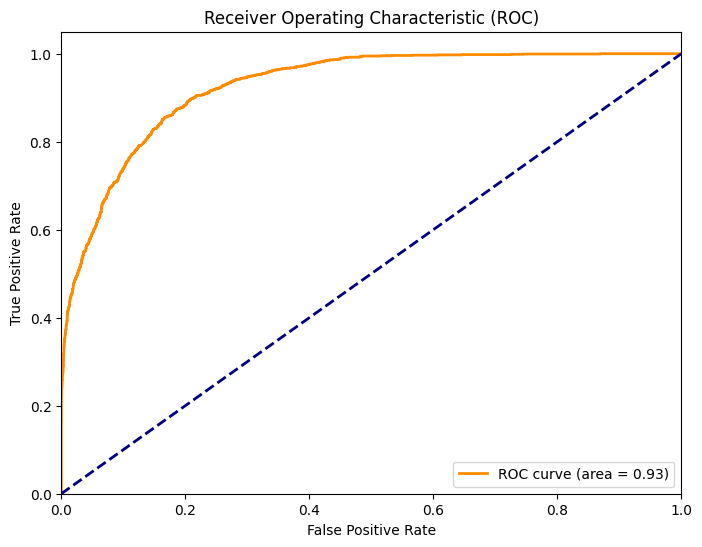

Sensitivity: 0.60
Specificity: 0.95
Precision: 0.78
Confusion Matrix Accuracy: 0.87
Confusion Matrix:
[[4712  262]
 [ 602  909]]


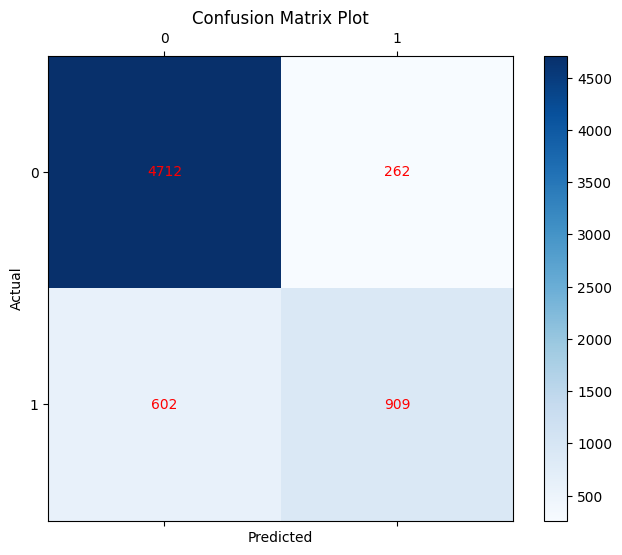

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters from Grid Search for Gradient Boosting:  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from Random Search for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 192}
100%|██████████| 20/20 [13:25<00:00, 40.25s/trial, best loss: -0.8730383502793518]
Best parameters from Bayesian Optimization for Gradient Boosting:  {'learning_rate': 0.13, 'max_depth': 4, 'n_estimators': 187}
Grid Search CV Accuracy: 0.8733578366438566
Random Search CV Accuracy: 0.8735429456387992
Bayesian Optimization CV Accuracy: 0.8724942721232549
newgb Accuracy with One-Hot Encoding: 87.57%


In [ ]:
###gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
# Prepare the features and target variable
X_encoded = data_encoded.drop('income', axis=1)
Y_encoded = data_encoded['income']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier
gradient_boosting.fit(X_train_encoded, y_train_encoded)

# Predict using the trained Gradient Boosting model
y_pred_encoded = gradient_boosting.predict(X_test_encoded)

# Calculate the accuracy
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy with Gradient Boosting Classifier: {accuracy_encoded * 100:.2f}%")
##ROC and AUC

# Predict probabilities for ROC AUC
y_scores_encoded = gradient_boosting.predict_proba(X_test_encoded)[:, 1]
fpr_encoded, tpr_encoded, _ = roc_curve(y_test_encoded, y_scores_encoded)
roc_auc_encoded = auc(fpr_encoded, tpr_encoded)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_encoded, tpr_encoded, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_encoded)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
#S and S
# Calculate confusion matrix to get sensitivity and specificity
cmgb = confusion_matrix(y_test_encoded, y_pred_encoded)
TP = cmgb[1, 1]  # True Positives
TN = cmgb[0, 0]  # True Negatives
FP = cmgb[0, 1]  # False Positives
FN = cmgb[1, 0]  # False Negatives


# Calculate sensitivity (Recall or True Positive Rate)
sensitivity = TP / float(TP + FN)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (True Negative Rate)
specificity = TN / float(TN + FP)
print(f"Specificity: {specificity:.2f}")
# Calculate precision
precision = TP / float(TP + FP)
print(f"Precision: {precision:.2f}")
# Calculate accuracy from the confusion matrix
accuracy_cmgb = (TP + TN) / float(TP + TN + FP + FN)
print(f"Confusion Matrix Accuracy: {accuracy_cmgb:.2f}")
#Calculate the confusion matrix
print("Confusion Matrix:")
print(cmgb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cmgb, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cmgb.shape[0]):
    for j in range(cmgb.shape[1]):
        plt.text(j, i, cmgb[i, j], ha='center', va='center', color='red')

plt.show()

################## HP
# Define the parameter grid for Grid Search
param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.15],
    'max_depth': [3, 4]
}
# Create a GridSearchCV object
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose=1)
grid_search_gb.fit(X_train_encoded, y_train_encoded)

# Get the best parameters from grid search
print("Best parameters from Grid Search for Gradient Boosting: ", grid_search_gb.best_params_)

# Define the parameter distribution for Random Search
param_dist_gb = {
    'n_estimators': randint(100, 200),
    'learning_rate': [0.1, 0.15],
    'max_depth': randint(3, 5)
}

# Create a RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search_gb.fit(X_train_encoded, y_train_encoded)

# Get the best parameters from random search
print("Best parameters from Random Search for Gradient Boosting: ", random_search_gb.best_params_)

# Define the hyperparameter space for Bayesian Optimization
space_gb = {
    'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
    'learning_rate': hp.quniform('learning_rate', 0.1, 0.15, 0.01),
    'max_depth': hp.choice('max_depth', [3, 4])
}

# Objective function to minimize for Gradient Boosting
def objective_gb(params):
    params = {'n_estimators': int(params['n_estimators']), 'learning_rate': params['learning_rate'], 'max_depth': params['max_depth']}
    clf = GradientBoostingClassifier(**params, random_state=42)
    accuracy = cross_val_score(clf, X_train_encoded, y_train_encoded, cv=5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the Bayesian Optimization algorithm
trials_gb = Trials()
best_params_gb = fmin(fn=objective_gb, space=space_gb, algo=tpe.suggest, max_evals=20, trials=trials_gb)

# Convert max_depth to the actual value since it's returned as an index
best_params_gb['max_depth'] = [3, 4, 5][best_params_gb['max_depth']]
best_params_gb['n_estimators'] = int(best_params_gb['n_estimators'])
best_params_gb['learning_rate'] = float(best_params_gb['learning_rate'])

print("Best parameters from Bayesian Optimization for Gradient Boosting: ", best_params_gb)
####################CV
# Define the hyperparameters sets from the results of the different searches
params_grid_search = {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150}
params_random_search = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 192}
params_bayesian_opt = {'learning_rate': 0.13, 'max_depth': 4, 'n_estimators': 141}

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation
def evaluate_model(params, X, y, kf):
    model = GradientBoostingClassifier(**params, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return np.mean(cv_scores), cv_scores

# Evaluate each model with cross-validation
accuracy_grid_search, scores_grid_search = evaluate_model(params_grid_search, X_encoded, Y_encoded, kf)
accuracy_random_search, scores_random_search = evaluate_model(params_random_search, X_encoded, Y_encoded, kf)
accuracy_bayesian_opt, scores_bayesian_opt = evaluate_model(params_bayesian_opt, X_encoded, Y_encoded, kf)

print(f'Grid Search CV Accuracy: {accuracy_grid_search}')
print(f'Random Search CV Accuracy: {accuracy_random_search}')
print(f'Bayesian Optimization CV Accuracy: {accuracy_bayesian_opt}')
##########

####After CV, we use random search
# Best parameters from random Search
params_random_search = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 192}

# Create a RandomForestClassifier with the best parameters
gbbest_model= GradientBoostingClassifier(**params_random_search, random_state=42)

# Assuming `X_train_encoded` and `y_train_encoded` are available, we will fit the model
gbbest_model.fit(X_train_encoded, y_train_encoded)

# We will also assume that we have `X_test_encoded` and `y_test_encoded` to evaluate the model
y_pred_encoded = gbbest_model.predict(X_test_encoded)
newgb_accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"newgb Accuracy with One-Hot Encoding: {newgb_accuracy_encoded * 100:.2f}%")